In [1]:
# Make project root visible so we can import src modules
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

project_root


'c:\\Users\\User\\Desktop\\KAIM\\Week_4\\credit-risk-model'

In [2]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [3]:
from src.train import load_data

X, y = load_data()

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)

2025-12-29 23:41:24,421 - INFO - Loading data from C:\Users\User\Desktop\KAIM\Week_4\credit-risk-model\Data\data.csv...
2025-12-29 23:41:28,832 - INFO - Feature DataFrame shape: (3742, 13)
2025-12-29 23:41:28,836 - INFO - Target distribution: 0 (low risk)=3550, 1 (high risk)=192


Feature matrix shape: (3742, 13)
Target shape: (3742,)


In [4]:
X.head()

,total_amount,avg_amount,transaction_count,max_amount,min_amount,std_amount,currency_code,country_code,most_common_category,most_common_channel,recency_days,amount_range,amount_std_ratio
0,-10000.0,-10000.000000,1,-10000.0,-10000.0,NaN,UGX,256,airtime,ChannelId_2,84,0.0,NaN
1,-10000.0,-10000.000000,1,-10000.0,-10000.0,NaN,UGX,256,airtime,ChannelId_2,84,0.0,NaN
2,20000.0,4000.000000,5,10000.0,-5000.0,6558.963333,UGX,256,financial_services,ChannelId_3,90,15000.0,1.639741
3,4225.0,384.090909,11,1500.0,-75.0,560.498966,UGX,256,financial_services,ChannelId_2,26,1575.0,1.459287
4,20000.0,3333.333333,6,10000.0,-5000.0,6030.478146,UGX,256,airtime,ChannelId_3,12,15000.0,1.809143


In [5]:
y = pd.Series(y, name="target")

X.shape, y.shape

((3742, 13), (3742,))

In [6]:
X.dtypes

total_amount            float64
avg_amount              float64
transaction_count         int64
max_amount              float64
min_amount              float64
std_amount              float64
currency_code            object
country_code              int64
most_common_category     object
most_common_channel      object
recency_days              int64
amount_range            float64
amount_std_ratio        float64
dtype: object

In [7]:
# Understanding class balance
y.value_counts()

target
0    3550
1     192
Name: count, dtype: int64

In [8]:
# Convert NumPy array to pandas Series
y_series = pd.Series(y, name="target")

# Count values
print(y_series.value_counts())

# Normalized counts (proportions)
print(y_series.value_counts(normalize=True))

target
0    3550
1     192
Name: count, dtype: int64
target
0    0.948691
1    0.051309
Name: proportion, dtype: float64


2025-12-29 23:41:47,047 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-29 23:41:47,059 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


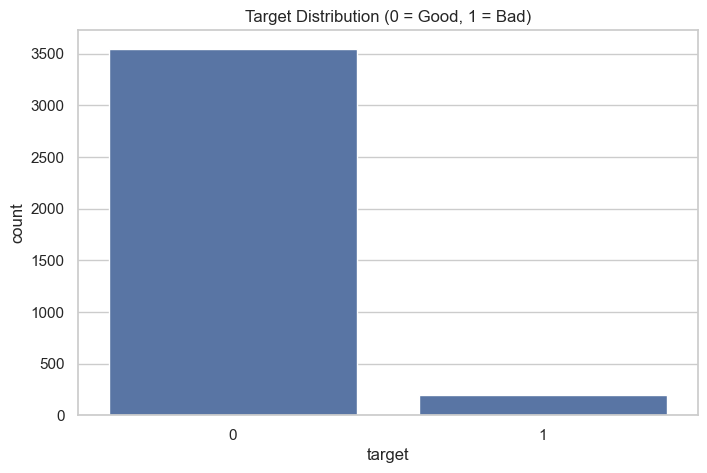

In [9]:
sns.countplot(x=y)
plt.title("Target Distribution (0 = Good, 1 = Bad)")
plt.show()

In [10]:
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
numeric_cols

Index(['total_amount', 'avg_amount', 'transaction_count', 'max_amount',
       'min_amount', 'std_amount', 'country_code', 'recency_days',
       'amount_range', 'amount_std_ratio'],
      dtype='object')

In [11]:
# Inspect types
print(X.dtypes)

# List numeric columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
print("Numeric columns:", numeric_cols)


total_amount            float64
avg_amount              float64
transaction_count         int64
max_amount              float64
min_amount              float64
std_amount              float64
currency_code            object
country_code              int64
most_common_category     object
most_common_channel      object
recency_days              int64
amount_range            float64
amount_std_ratio        float64
dtype: object
Numeric columns: Index(['total_amount', 'avg_amount', 'transaction_count', 'max_amount',
       'min_amount', 'std_amount', 'country_code', 'recency_days',
       'amount_range', 'amount_std_ratio'],
      dtype='object')


In [12]:
# Select all numeric columns (int or float)
numeric_cols = X.select_dtypes(include=["number"]).columns
print("Numeric columns:", numeric_cols)

Numeric columns: Index(['total_amount', 'avg_amount', 'transaction_count', 'max_amount',
       'min_amount', 'std_amount', 'country_code', 'recency_days',
       'amount_range', 'amount_std_ratio'],
      dtype='object')


In [13]:
X[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
total_amount,3742.0,171737.740647,2.717305e+06,-1.049000e+08,4077.437500,20000.000000,79967.750000,8.345124e+07
avg_amount,3742.0,15715.616012,1.676991e+05,-4.250000e+05,1000.000000,2583.846429,4877.613636,8.601821e+06
transaction_count,3742.0,25.564404,9.692960e+01,1.000000e+00,2.000000,7.000000,20.000000,4.091000e+03
max_amount,3742.0,50838.725815,3.598691e+05,-2.000000e+05,2000.000000,10000.000000,18375.000000,9.880000e+06
min_amount,3742.0,3863.506026,8.583664e+04,-1.000000e+06,-5000.000000,-1000.000000,500.000000,2.000000e+06
std_amount,3030.0,16802.155720,1.074311e+05,0.000000e+00,1533.574055,5389.779013,7549.049946,3.309916e+06
country_code,3742.0,256.000000,0.000000e+00,2.560000e+02,256.000000,256.000000,256.000000,2.560000e+02
recency_days,3742.0,31.461251,2.711893e+01,1.000000e+00,6.000000,25.000000,54.000000,9.100000e+01
amount_range,3742.0,46975.219789,3.442942e+05,0.000000e+00,1042.500000,11000.000000,18437.500000,8.784140e+06
amount_std_ratio,3030.0,218164.207438,4.627269e+06,-2.828509e+02,1.207264,1.614855,2.082640,1.414214e+08


In [22]:
# # Distribution of Numerical Features
# # Used to detect skewness, abnormal ranges, and potential transformations.
# for col in numeric_cols:
#     sns.histplot(X[col], kde=True)
#     plt.title(f"Distribution of {col}")
#     plt.show()


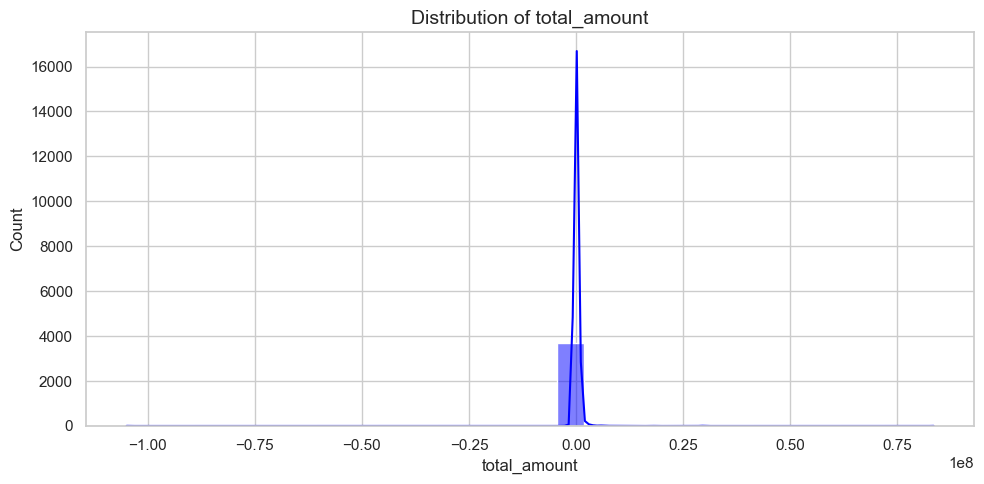

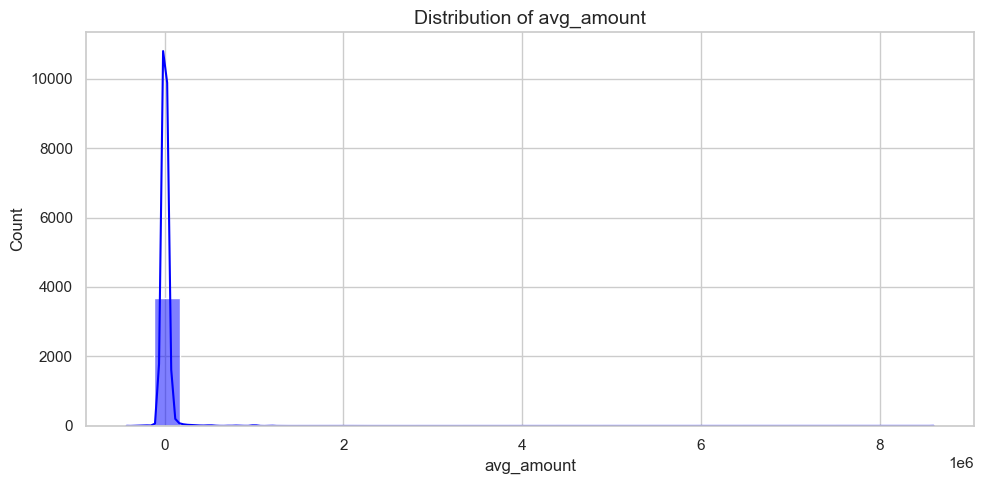

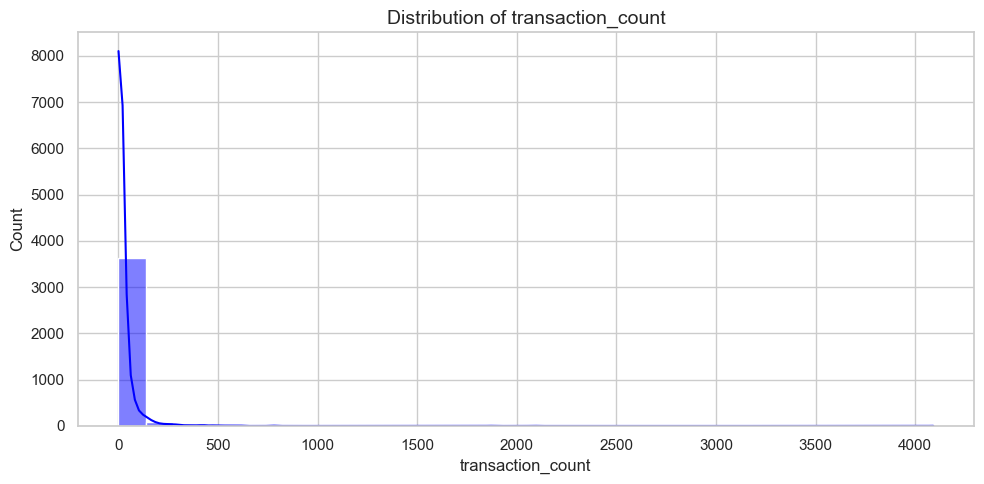

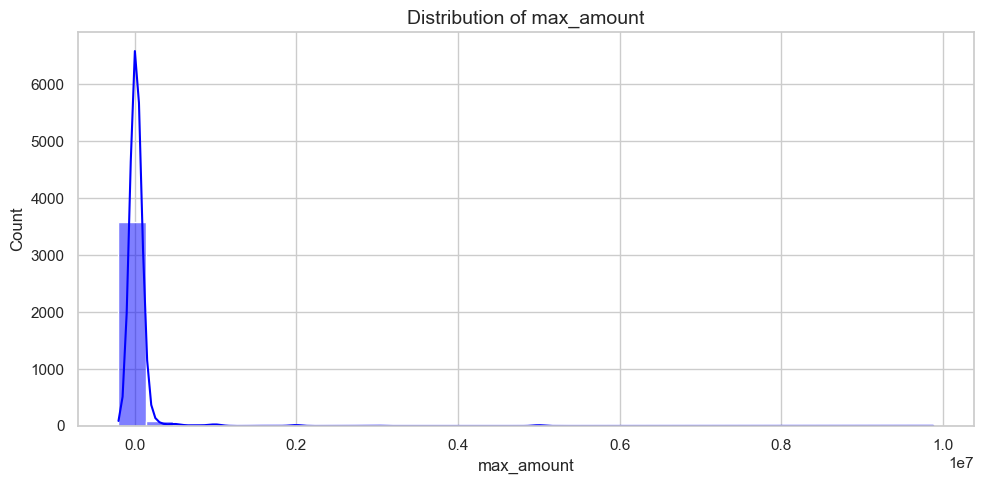

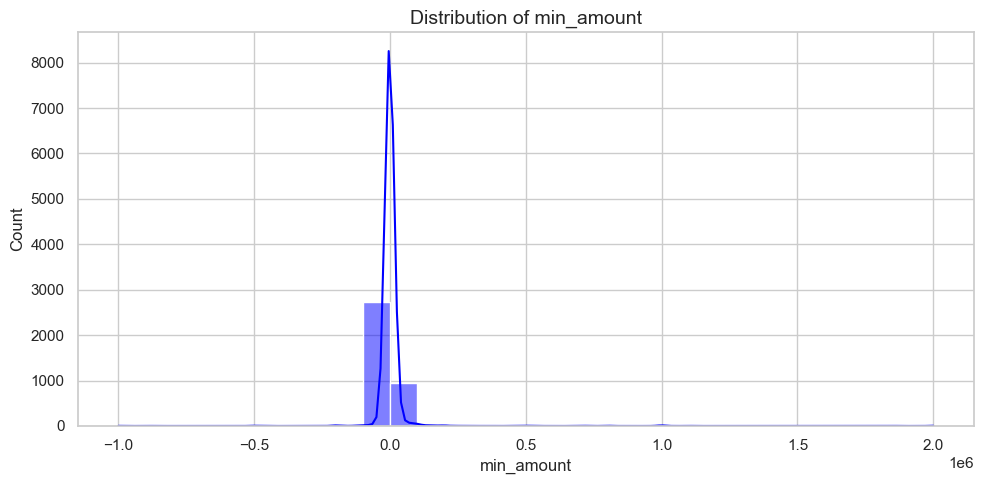

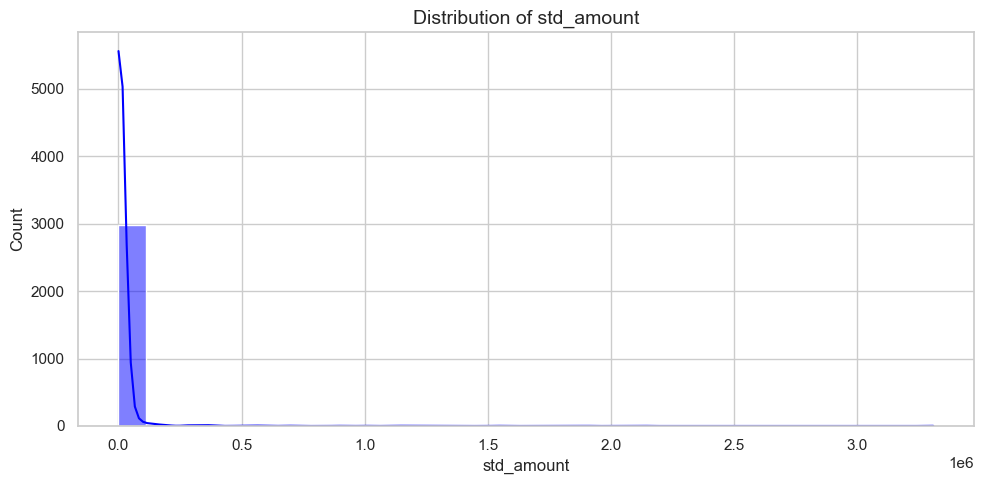

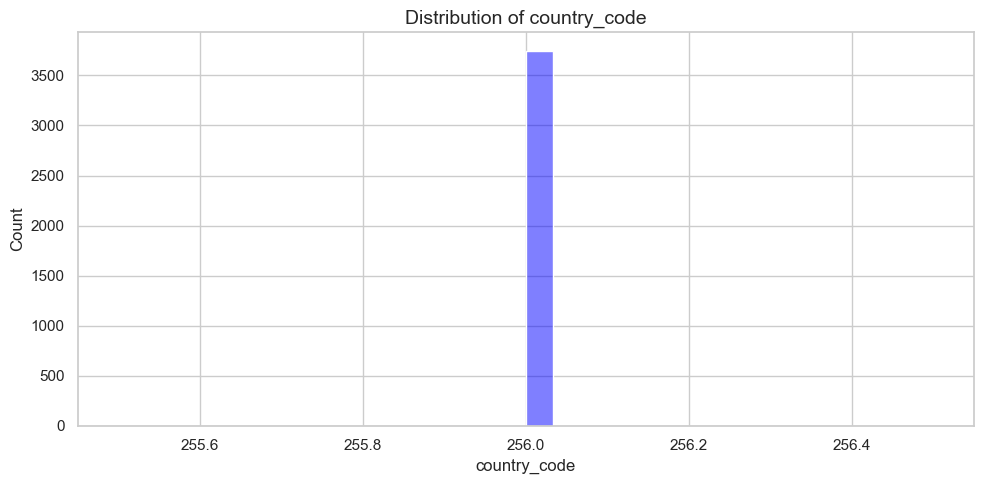

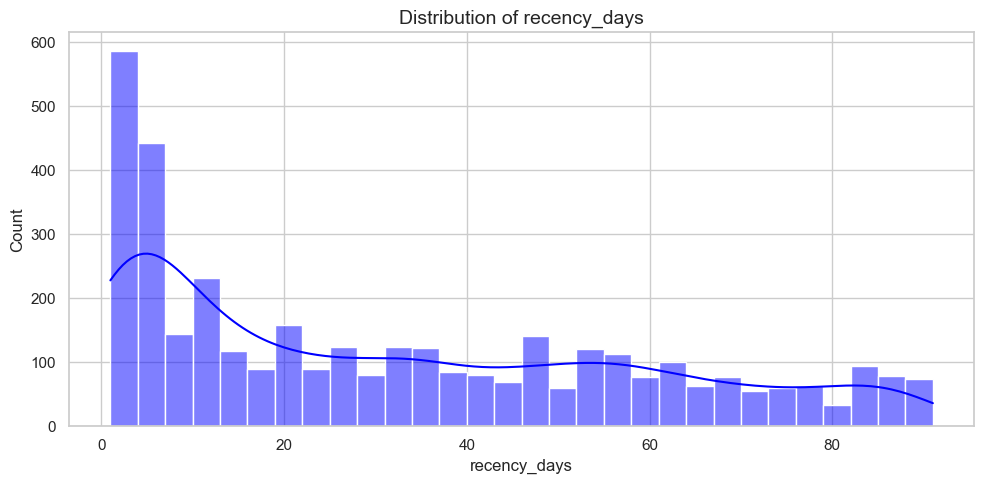

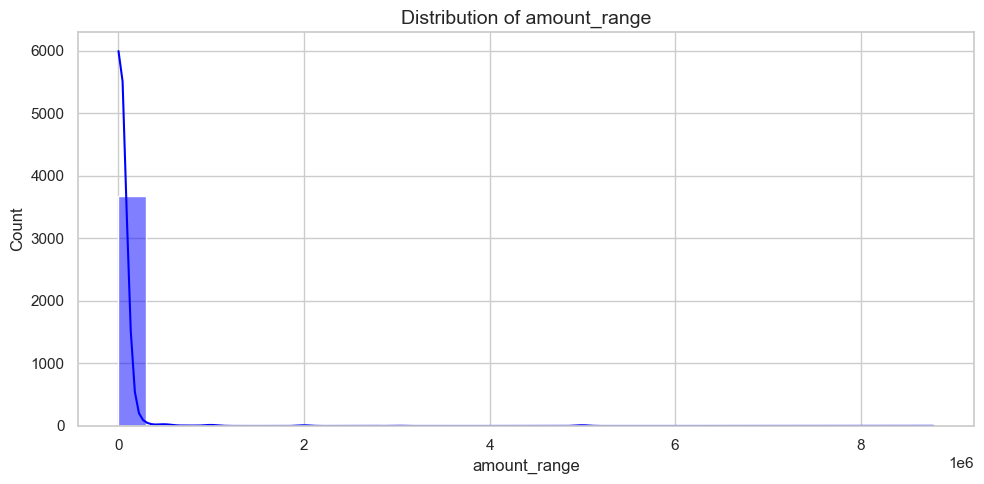

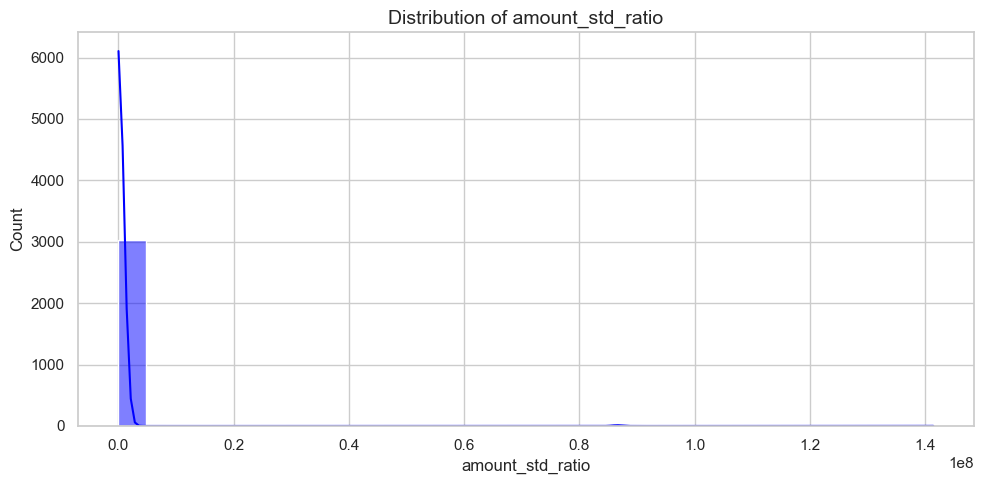

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Numerical Features
# Used to detect skewness, abnormal ranges, and potential transformations.
for col in numeric_cols:
    plt.figure(figsize=(10, 5))  # Make the figure wider and taller
    sns.histplot(X[col], kde=True, bins=30, color='blue')  # optional: adjust bins and color
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.tight_layout()  
    plt.show()


In [15]:
# Distribution of Categorical Features
# Understanding dominant categories and sparsity.
categorical_cols = X.select_dtypes(include=["object"]).columns
categorical_cols

Index(['currency_code', 'most_common_category', 'most_common_channel'], dtype='object')

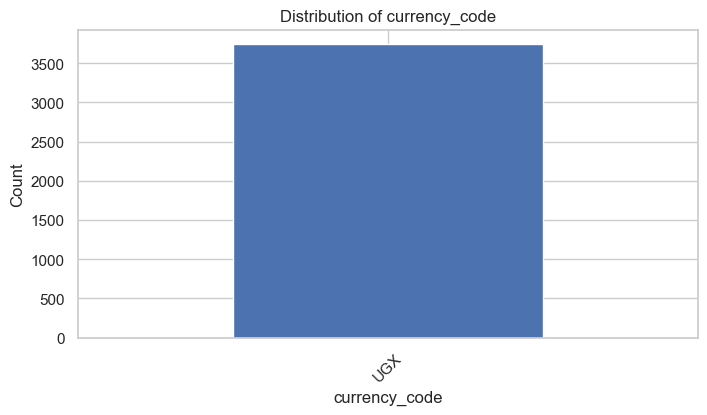

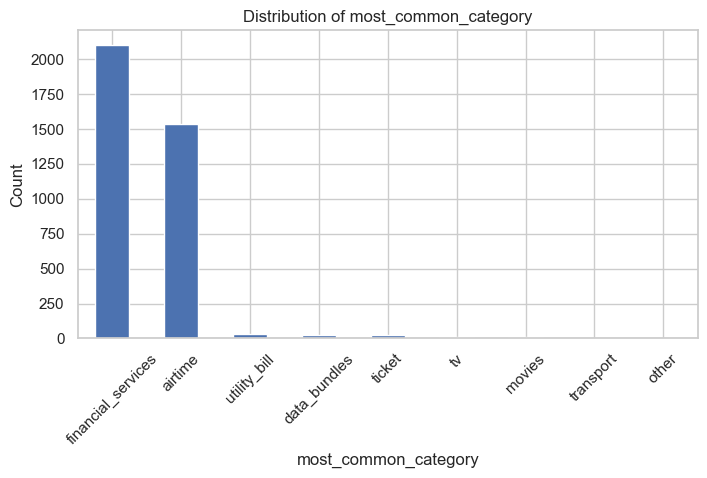

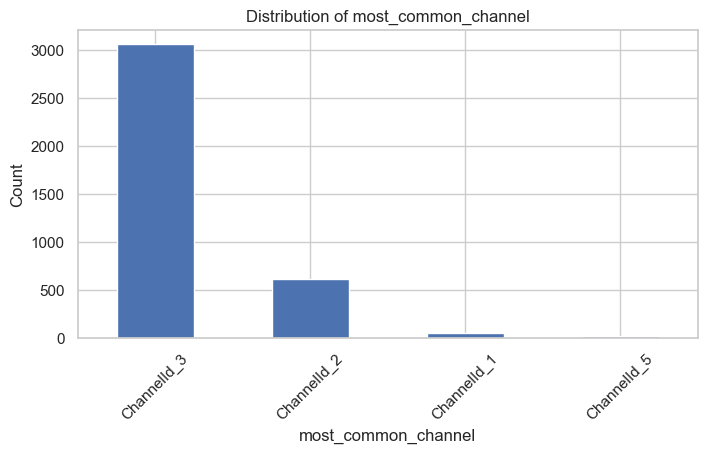

In [16]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    X[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


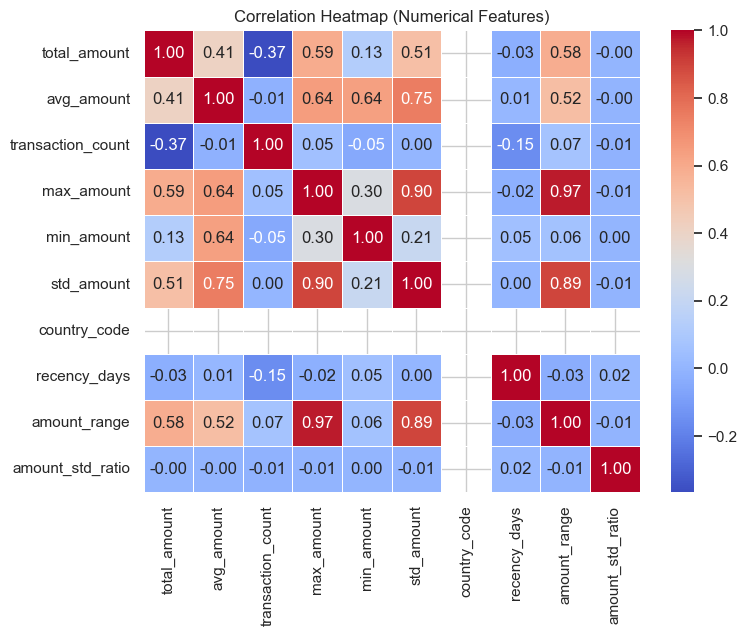

In [17]:
# Correlation Analysis (Numerical Features)
# To detect multicollinearity and redundant variables

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,         # show correlation values
    fmt=".2f",          # 2 decimal places
    linewidths=0.5
)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()



In [18]:
# Missing Value Analysis
# Determines need for imputation strategies.


missing_counts = X.isnull().sum()  # counts NaNs in each column
missing_percent = (missing_counts / len(X)) * 100  # percentage of missing
missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_percent
})
missing_df[missing_df["missing_count"] > 0]  # show only columns with missing values



,missing_count,missing_percent
std_amount,712,19.027258
amount_std_ratio,712,19.027258


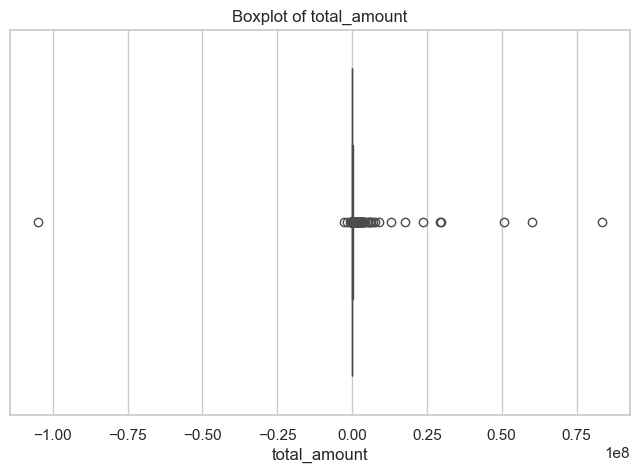

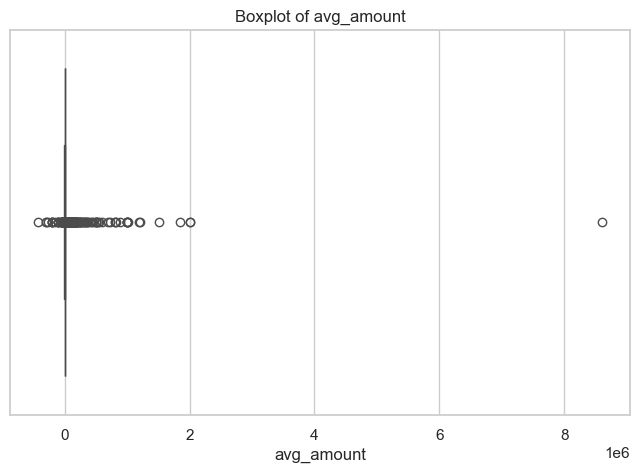

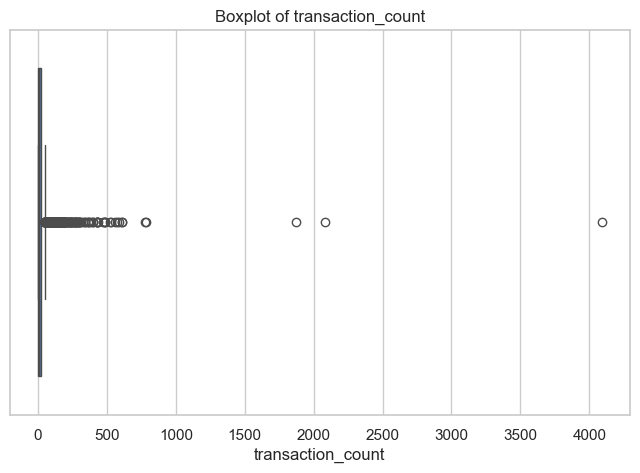

In [19]:
for col in numeric_cols:
    sns.boxplot(x=X[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
